In [34]:
import pandas as pd
import numpy as np

import scipy
import seaborn as sns
import matplotlib.style as style
import matplotlib
from sklearn import manifold
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [35]:
df = pd.read_csv("spotify_data_countries_rows.csv")

In [36]:
# Cleaning up the file for analysis
df = df.set_index('Unnamed: 0')

In [37]:
df.index.name = 'country'

In [38]:
df.columns = df.columns.astype(int)

In [39]:
df = df[sorted(df.columns)]

In [40]:
df.head(15)

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
country,,,,,,,,,,,,,,,,,,,,,
us,Señorita by Shawn Mendes,Panini by Lil Nas X,Money In The Grave (Drake ft. Rick Ross) by Drake,bad guy by Billie Eilish,Old Town Road - Remix by Lil Nas X,You Need To Calm Down by Taylor Swift,Truth Hurts by Lizzo,Ransom by Lil Tecca,Rodeo by Lil Nas X,I Don't Care (with Justin Bieber) by Ed Sheeran,...,Racks In The Middle (feat. Roddy Ricch and Hit...,No Role Modelz by J. Cole,Close To Me (with Diplo) (feat. Swae Lee) by E...,Cool by Jonas Brothers,Believer by Imagine Dragons,3 Nights by Dominic Fike,Bitchuary by Shordie Shordie,Heaven by Kane Brown,Don't Stop Believin' by Journey,Close Friends (Lil Baby & Gunna) by Lil Baby
gb,Señorita by Shawn Mendes,I Don't Care (with Justin Bieber) by Ed Sheeran,Someone You Loved by Lewis Capaldi,Vossi Bop by Stormzy,bad guy by Billie Eilish,Piece Of Your Heart by MEDUZA,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Old Town Road - Remix by Lil Nas X,Hold Me While You Wait by Lewis Capaldi,Crown by Stormzy,...,Summer Of '69 by Bryan Adams,Loco Contigo (with J. Balvin & Tyga) by DJ Snake,Electricity (with Dua Lipa) by Silk City,In My Mind by Dynoro,I Wanna Dance with Somebody (Who Loves Me) by ...,Juice by Lizzo,New Rules by Dua Lipa,ZEZE (feat. Travis Scott & Offset) by Kodak Black,Drip Too Hard (Lil Baby & Gunna) by Lil Baby,I Fall Apart by Post Malone
ar,Otro Trago by Sech,Soltera - Remix by Lunay,Callaita by Bad Bunny,Tal Vez by Paulo Londra,Pa Mí - Remix by Dalex,Con Altura by ROSALÍA,Señorita by Shawn Mendes,Cuaderno by Dalex,No Me Conoce - Remix by Jhay Cortez,11 PM by Maluma,...,Wapo Traketero by Nicki Nicole,She Don't Give a Fo by Duki,Puente by Gustavo Cerati,2 Pa' 2 by Rombai,Tan lejos by No Te Va Gustar,Rangos by Pekeño 77,Calle2 by FMK,"thank u, next by Ariana Grande",Sunflower - Spider-Man: Into the Spider-Verse ...,PURPURA by WOS
at,Tilidin by Capital Bra,Señorita by Shawn Mendes,Diamonds (feat. Capital Bra) by Summer Cem,weR mAChT PaRA 2 by Dardan,Wieder Lila by Samra,Royal Rumble by Kalazh44,EFH by Shindy,I Don't Care (with Justin Bieber) by Ed Sheeran,bad guy by Billie Eilish,Old Town Road - Remix by Lil Nas X,...,Truth Hurts by Lizzo,wish you were gay by Billie Eilish,Say My Name by David Guetta,Bohemian Rhapsody - Remastered 2011 by Queen,All In by Azad,Nummer unterdrückt by Bonez MC,Don't Stop Me Now - Remastered by Queen,Nevermind by Dennis Lloyd,Lambo Diablo GT (feat. Nimo & Juju) - Remix by...,Fading by Alle Farben
au,Señorita by Shawn Mendes,I Don't Care (with Justin Bieber) by Ed Sheeran,bad guy by Billie Eilish,Old Town Road - Remix by Lil Nas X,Money In The Grave (Drake ft. Rick Ross) by Drake,Someone You Loved by Lewis Capaldi,You Need To Calm Down by Taylor Swift,Never Really Over by Katy Perry,Cross Me (feat. Chance the Rapper & PnB Rock) ...,No Guidance (feat. Drake) by Chris Brown,...,Congratulations by Post Malone,Castle on the Hill by Ed Sheeran,Nonstop by Drake,No Scrubs by TLC,Love Someone by Lukas Graham,Younger by Ruel,Loco Contigo (with J. Balvin & Tyga) by DJ Snake,Promises (with Sam Smith) by Calvin Harris,all the good girls go to hell by Billie Eilish,The Less I Know The Better by Tame Impala
au,Old Town Road - Remix by Lil Nas X,I Don't Care (with Justin Bieber) by Ed Sheeran,Señorita by Shawn Mendes,Piece Of Your Heart by MEDUZA,bad guy by Billie Eilish,SOS (feat. Aloe Blacc) by Avicii,Someone You Loved by Lewis Capaldi,Don't Call Me Up by Mabel,Con Calma by Daddy Yankee,Old Town Road by Lil Nas X,...,Jocelyn Flores by XXXTENTACION,Sultans Of Swing by Dire Straits,La thune by Angèle,Sixteen by Ellie Goulding,Trop beau by Lomepal,Let You Love Me by Rita Ora,Perfect by Ed Sheeran,Soleil by Roméo Elvis,Truth Never Lies (feat. Aloe Blacc) by Lost Fr...,Suge by DaBaby
be,Señorita by Shawn Mendes,Da Ili Ne by Krisko,Old Town Road - Remix by Lil Nas X,bad guy by Billie Eilish,I Don't Care (with Justin Bieber) by Ed Sheeran,Gladen by Itzo Hazarta,Panini

In [8]:
# save cleaned file
# df.to_csv("spotify_data_countries_rows_sorted.csv")

I want to compare countries to each other based on if they listen to the same top 200 songs. To do this I'm going to calculate jaccard indexes (the size of the intersection divided by the size of the union of two sample sets).

In [44]:
# creating some test countries
us = df.values.tolist()[0]
au = df.values.tolist()[4]
ar = df.values.tolist()[2]

In [45]:
def jaccard_dissimilarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return 1 - len(s1.intersection(s2)) / len(s1.union(s2))

jaccard_dissimilarity(us, au)

0.5815602836879432

In [46]:
jaccard_dissimilarity(us, ar)

0.921832884097035

In [47]:
# Calculating the jaccard index between countries and saving the results to a correlation matrix
master = df.values.tolist()

sims = []
for item1 in master:
    m_list = []
    for item2 in master:
        country1, songs1 = master.index(item1), item1
        country2, songs2 = master.index(item2), item2
        distance = jaccard_dissimilarity(songs1, songs2)
        m_list.append(distance)
    sims.append(m_list)

In [57]:
sims

[[0.0,
  0.7138263665594855,
  0.921832884097035,
  0.8304093567251463,
  0.5815602836879432,
  0.7616099071207431,
  0.6428571428571428,
  0.9189189189189189,
  0.9389920424403183,
  0.360655737704918,
  0.7915407854984894,
  0.9501312335958005,
  0.9333333333333333,
  0.8950276243093923,
  0.6440677966101696,
  0.7767584097859327,
  0.8668555240793201,
  0.8269794721407624,
  0.9276139410187667,
  0.9417989417989419,
  0.6798679867986799,
  0.921832884097035,
  0.8505747126436781,
  0.9304812834224598,
  0.7220447284345048,
  0.9247311827956989,
  0.8023952095808383,
  0.9010989010989011,
  0.7341772151898734,
  0.8603988603988604,
  0.6928104575163399,
  0.7616099071207431,
  0.8130563798219584,
  0.7692307692307692,
  0.9159891598915989,
  0.9189189189189189,
  0.6394557823129252,
  0.7012987012987013,
  0.6885245901639344,
  0.6577181208053691,
  0.9159891598915989,
  0.7915407854984894,
  0.9100817438692098,
  0.8338192419825072,
  0.7730061349693251,
  0.5815602836879432,
  0.90

In [48]:
matrix = np.array(sims)
m = np.asmatrix(matrix)

sim_matrix_df = pd.DataFrame(m)

In [66]:
# sim_matrix_df.to_csv('spotify-json.csv', index=False)

In [17]:
# Renaming the dataframe's columns and index to reflect the countries

di = {0:'United States',1:'United Kingdom',2:'Argentina',3:'Austria',4:'Australia',5:'Belgium',6:'Bulgaria',7:'Bolivia',8:'Brazil',9:'Canada',10:'Switzerland',11:'Chile',12:'Colombia',13:'Costa Rica',14:'Cyprus',15:'Czech Republic',16:'Germany',
      17:'Denmark',18:'Dominican Republic',19:'Ecuador',20:'Estonia',21:'Spain',22:'Finland',23:'France',24:'Greece',25:'Guatamala',26:'Hong Kong',
      27:'Honduras',28:'Hungary',29:'Indonesia',30:'Ireland',31:'Israel',32:'India',33:'Iceland',34:'Italy',35:'Japan',36:'Lithuania',37:'Luxembourg',38:'Latvia',
      39:'Malta',40:'Mexico',41:'Malaysia',42:'Nicaragua',43:'Netherlands',44:'Norway',45:'New Zealand',46:'Panama',47:'Peru',48:'Philippines',
            49:'Poland',50:'Portugal',51:'Paraguay',52:'Romania',53:'Sweden',54:'Singapore',55:'Slovakia',56:'El Savador',57:'Thailand',58:'Turkey',59:'Taiwan',60:'Uruguay',61:'Viet Nam',62:'South Africa'}

sim_matrix_df.columns = sim_matrix_df.columns.map(di)

sim_matrix_df.index = sim_matrix_df.index.map(di)

In [18]:
sim_matrix_df

,United States,United Kingdom,Argentina,Austria,Australia,Belgium,Bulgaria,Bolivia,Brazil,Canada,...,Sweden,Singapore,Slovakia,El Savador,Thailand,Turkey,Taiwan,Uruguay,Viet Nam,South Africa
United States,0.000000,0.713826,0.921833,0.830409,0.581560,0.761610,0.642857,0.918919,0.938992,0.360656,...,0.870056,0.791541,0.722045,0.904110,0.876404,0.947368,0.830409,0.938992,0.833819,0.576512
United Kingdom,0.713826,0.000000,0.938992,0.787879,0.601399,0.697068,0.708738,0.938992,0.933333,0.644068,...,0.850575,0.802395,0.713826,0.915989,0.882682,0.938992,0.826979,0.952880,0.837209,0.634812
Argentina,0.921833,0.938992,0.000000,0.944591,0.924731,0.921833,0.918699,0.534799,0.950131,0.918919,...,0.950131,0.927614,0.924731,0.596491,0.952880,0.969072,0.944591,0.387097,0.936170,0.927614
Austria,0.830409,0.787879,0.944591,0.000000,0.791541,0.761610,0.798193,0.944591,0.941799,0.802395,...,0.847262,0.833819,0.750000,0.930481,0.907104,0.936170,0.850575,0.955614,0.873239,0.776758
Australia,0.581560,0.601399,0.924731,0.791541,0.000000,0.675497,0.633562,0.921833,0.924731,0.473282,...,0.837209,0.717949,0.639456,0.901099,0.860399,0.936170,0.776758,0.947368,0.780488,0.467433
Belgium,0.761610,0.697068,0.921833,0.761610,0.675497,0.000000,0.717042,0.918919,0.930481,0.709677,...,0.833819,0.791541,0.653199,0.898072,0.888889,0.930481,0.820059,0.936170,0.820059,0.671096
Bulgaria,0.642857,0.708738,0.918699,0.798193,0.633562,0.717042,0.000000,0.909836,0.924528,0.600000,...,0.853448,0.776074,0.661074,0.897790,0.876056,0.930295,0.801802,0.938830,0.819527,0.633562
Bolivia,0.918919,0.938992,0.534799,0.944591,0.921833,0.918919,0.909836,0.000000,0.941799,0.915989,...,0.947368,0.930481,0.915989,0.340249,0.955614,0.966408,0.947368,0.473282,0.936170,0.924731
Brazil,0.938992,0.933333,0.950131,0.941799,0.924731,0.930481,0.924528,0.941799,0.000000,0.930481,...,0.950131,0.938992,0.924731,0.936170,0.947368,0.966408,0.941799,0.958333,0.938992,0.924731
Canada,0.360656,0.644068,0.918919,0.802395,0.473282,0.709677,0.600000,0.915989,0.930481,0.000000,...,0.847262,0.738170,0.648649,0.895028,0.863636,0.944591,0.780488,0.938992,0.802395,0.473282


To visualize the data, I thought about turning the correlation matrix into x and y coordinates. I didn't end up going this route so feel free to skip ahead to the heat map.

In [20]:
model = manifold.MDS(dissimilarity='precomputed')

In [22]:
coors = model.fit_transform(matrix)

/Users/amyokruk/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/Users/amyokruk/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:2001: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/amyokruk/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py:1079: RuntimeWarning: Glyph 8722 missing from current font.
  flags=LOAD_NO_SCALE | LOAD_NO_HINTING)
/Users/amyokruk/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/amyokruk/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text

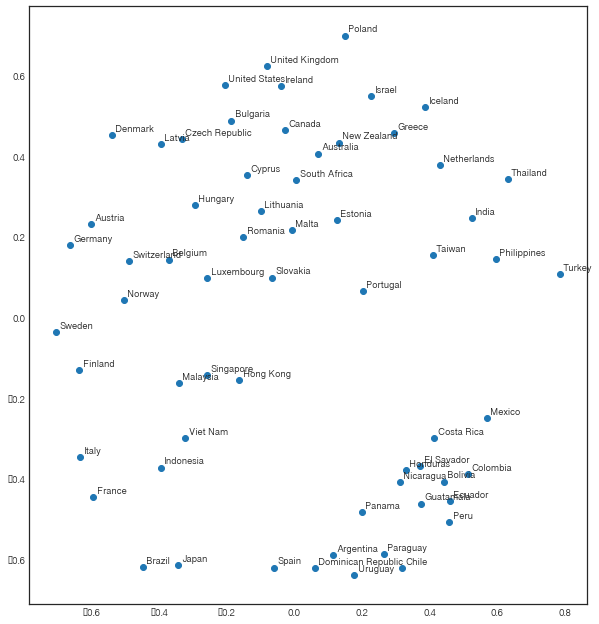

In [23]:
style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(10,11))
ax.scatter(coors[:,0],coors[:,1])

for i, txt in enumerate(sim_matrix_df.columns):
    ax.annotate(txt, (coors[i, 0]+0.01, coors[i, 1]+0.01))

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Lao Sangam MN"
    
plt.savefig("spotify-graph-mobile3.pdf")

Time to make some cluster maps! The rest of this notebook is me playing around with seaborn and reordering the countries.

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
g = sns.heatmap(sim_matrix_df, cmap='BuPu_r', linewidths=0.9, cbar=None)
ax.invert_xaxis()
ax.set_aspect("equal")
ax.tick_params(labelleft=True, labeltop=True)
ax.tick_params(axis='x', labelrotation=45)
plt.setp(ax.get_xticklabels(), ha="left", rotation=45)
for label in ax.get_xticklabels():
    label.set_ha("left")
    label.set_rotation(45)

# plt.savefig('test.pdf')

In [28]:
ordered_matrix = sim_matrix_df[['Turkey','Brazil','France','Italy','Japan','Thailand','Philippines','Indonesia','Viet Nam','Malaysia',
      'Singapore','Hong Kong', 'Taiwan','India','Israel','Sweden','Finland','Poland','Denmark','Netherlands',
      'Iceland','Norway','Portugal','Greece','Czech Republic','Slovakia','Hungary','Bulgaria','Cyprus','Romania',
      'Estonia','Lithuania','Malta','Ireland','United Kingdom','Latvia', 'Belgium','Luxembourg','Switzerland',
      'Austria','Germany','Spain','Guatamala','Peru','Ecuador','Bolivia','Colombia','Paraguay','Chile','Uruguay',
      'Argentina','Dominican Republic','Costa Rica','Nicaragua','Honduras','El Savador','Panama','Mexico','United States',
      'Canada','Australia','New Zealand','South Africa']]

In [29]:
ordered_matrix = ordered_matrix.reindex(['Turkey','Brazil','France','Italy','Japan','Thailand','Philippines','Indonesia','Viet Nam','Malaysia',
      'Singapore','Hong Kong', 'Taiwan','India','Israel','Sweden','Finland','Poland','Denmark','Netherlands',
      'Iceland','Norway','Portugal','Greece','Czech Republic','Slovakia','Hungary','Bulgaria','Cyprus','Romania',
      'Estonia','Lithuania','Malta','Ireland','United Kingdom','Latvia', 'Belgium','Luxembourg','Switzerland',
      'Austria','Germany','Spain','Guatamala','Peru','Ecuador','Bolivia','Colombia','Paraguay','Chile','Uruguay',
      'Argentina','Dominican Republic','Costa Rica','Nicaragua','Honduras','El Savador','Panama','Mexico','United States',
      'Canada','Australia','New Zealand','South Africa'])

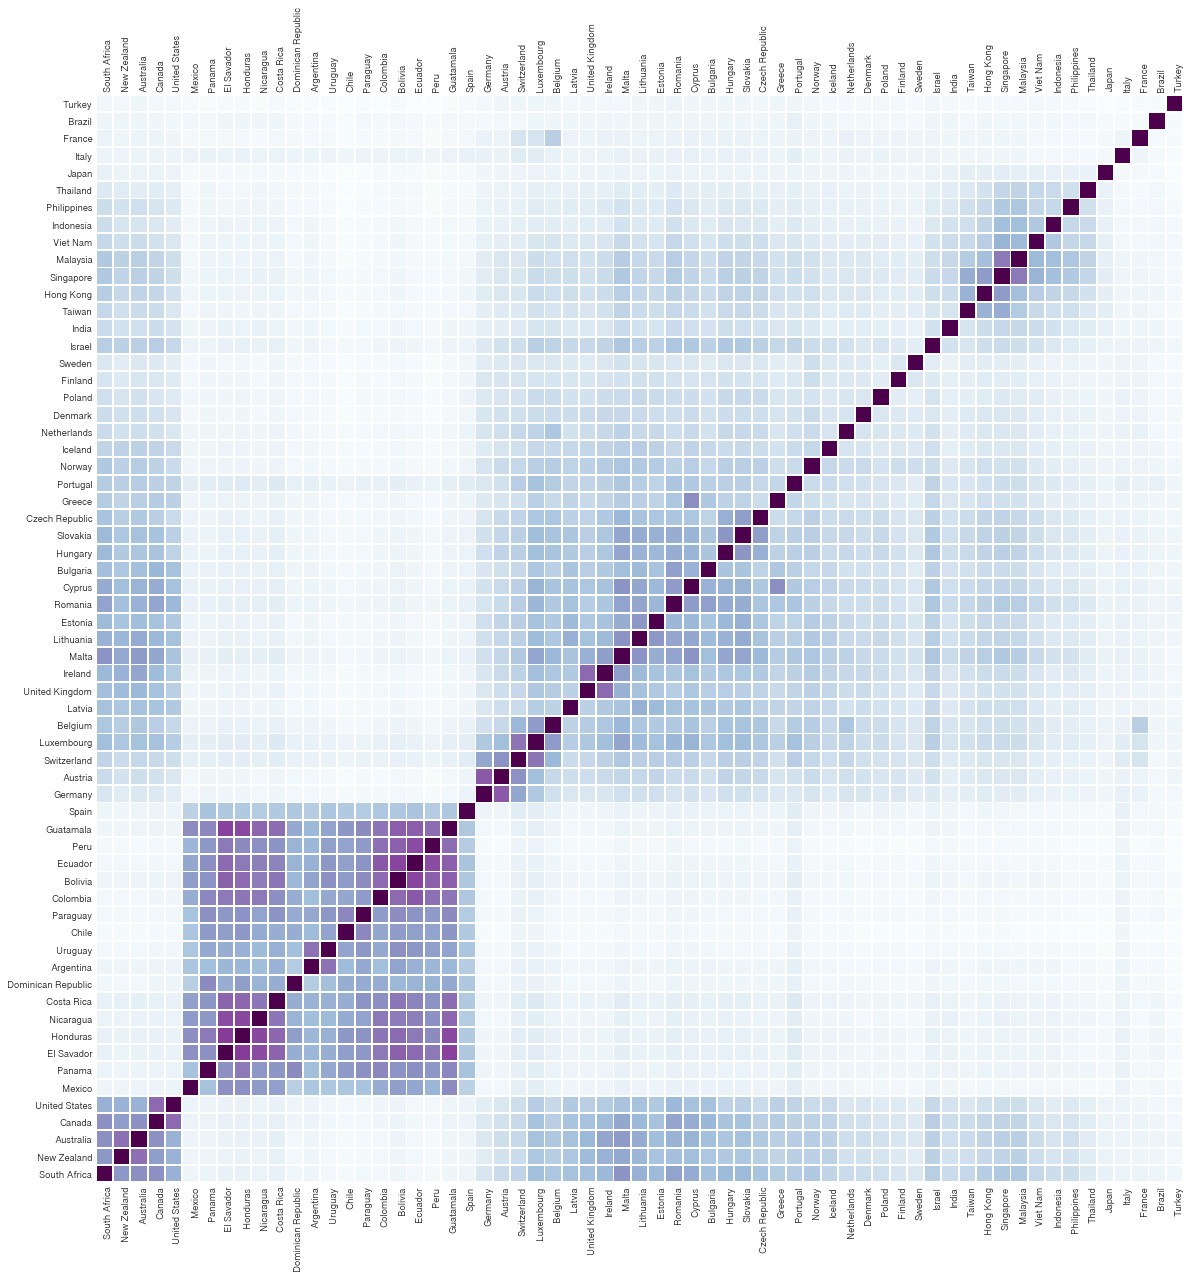

In [30]:
fig, ax = plt.subplots(figsize=(20,20)) 
g = sns.heatmap(ordered_matrix, cmap='BuPu_r', linewidths=0.9, cbar=None)
ax.invert_xaxis()
ax.set_aspect("equal")
ax.tick_params(labelleft=True, labeltop=True)
ax.tick_params(axis='x', labelrotation=90)
plt.setp(ax.get_xticklabels(), ha="left", rotation=90)
for label in ax.get_xticklabels():
    label.set_ha("left")
    label.set_rotation(90)

plt.savefig('ordered_heatmap.pdf')

In [31]:
ordered_matrix2 = ordered_matrix[['Turkey','Japan','Thailand','Philippines','Indonesia','Viet Nam','Malaysia',
      'Singapore','Hong Kong', 'Taiwan','India','Israel','France','Italy','Sweden','Finland','Poland','Denmark','Netherlands',
      'Iceland','Norway','Portugal','Greece','Czech Republic','Slovakia','Hungary','Bulgaria','Cyprus','Romania',
      'Estonia','Lithuania','Malta','Ireland','United Kingdom','Latvia', 'Belgium','Luxembourg','Switzerland',
      'Austria','Germany','Spain','Brazil','Guatamala','Peru','Ecuador','Bolivia','Colombia','Paraguay','Chile','Uruguay',
      'Argentina','Dominican Republic','Costa Rica','Nicaragua','Honduras','El Savador','Panama','Mexico','United States',
      'Canada','Australia','New Zealand','South Africa']]

In [32]:
ordered_matrix2 = ordered_matrix2.reindex(['Turkey','Japan','Thailand','Philippines','Indonesia','Viet Nam','Malaysia',
      'Singapore','Hong Kong', 'Taiwan','India','Israel','France','Italy','Sweden','Finland','Poland','Denmark','Netherlands',
      'Iceland','Norway','Portugal','Greece','Czech Republic','Slovakia','Hungary','Bulgaria','Cyprus','Romania',
      'Estonia','Lithuania','Malta','Ireland','United Kingdom','Latvia', 'Belgium','Luxembourg','Switzerland',
      'Austria','Germany','Spain','Brazil','Guatamala','Peru','Ecuador','Bolivia','Colombia','Paraguay','Chile','Uruguay',
      'Argentina','Dominican Republic','Costa Rica','Nicaragua','Honduras','El Savador','Panama','Mexico','United States',
      'Canada','Australia','New Zealand','South Africa'])

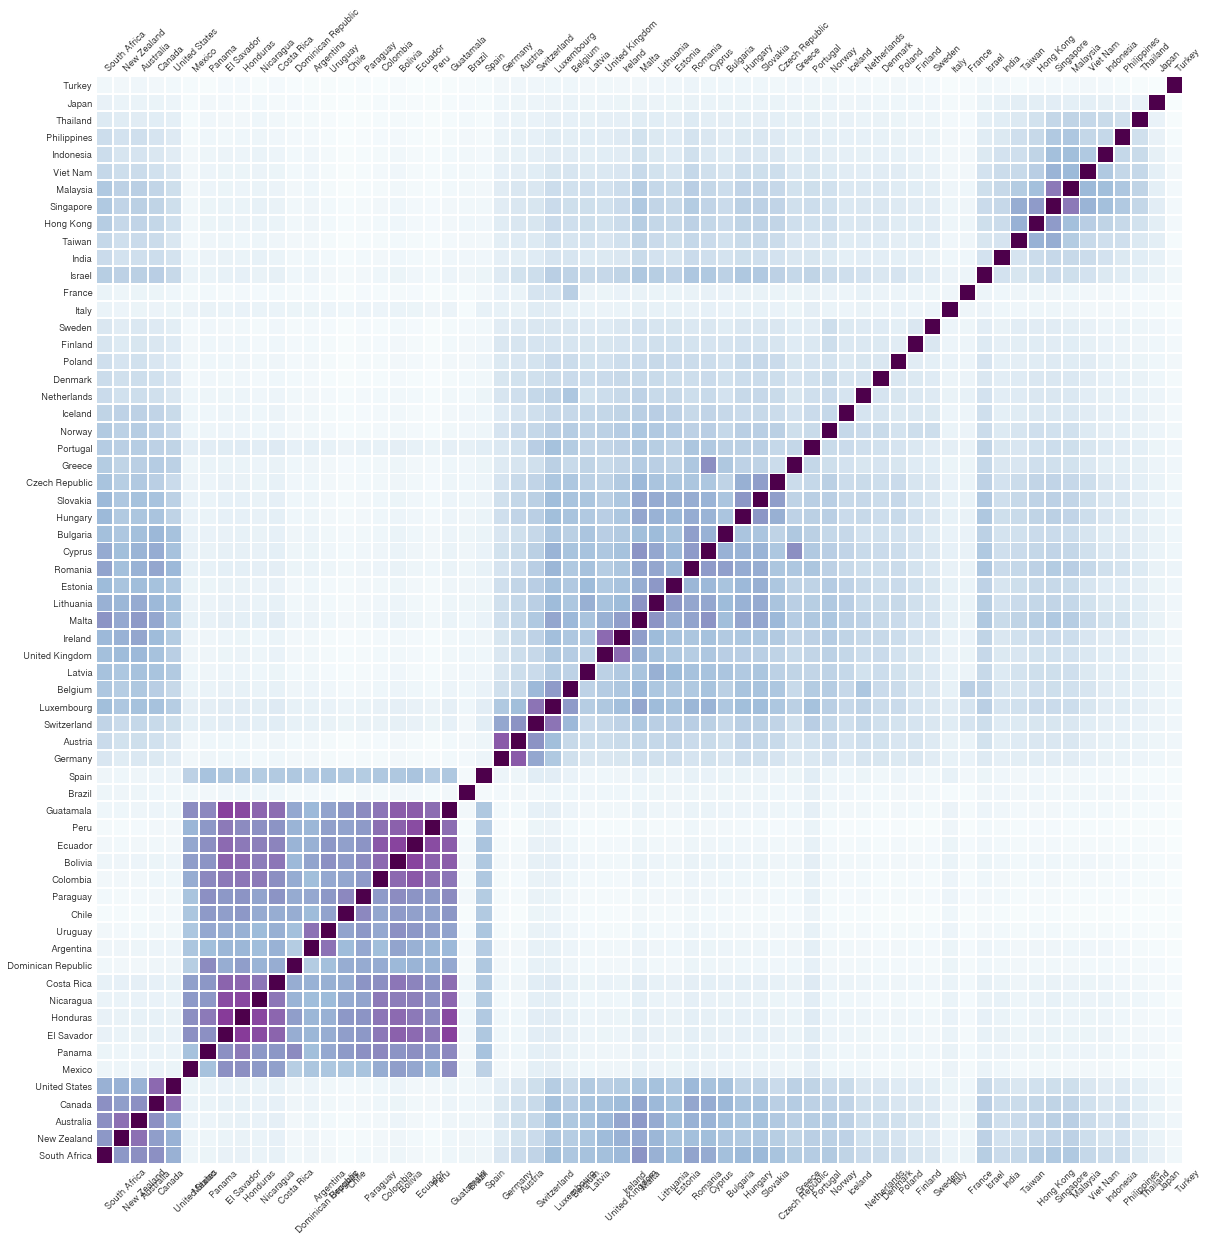

In [33]:
fig, ax = plt.subplots(figsize=(20,20)) 
g = sns.heatmap(ordered_matrix2, cmap='BuPu_r', linewidths=0.9, cbar=None)
ax.invert_xaxis()
ax.set_aspect("equal")
ax.tick_params(labelleft=True, labeltop=True)
ax.tick_params(axis='x', labelrotation=45)
plt.setp(ax.get_xticklabels(), ha="left", rotation=45)
for label in ax.get_xticklabels():
    label.set_ha("left")
    label.set_rotation(45)

plt.savefig('heatmap_no_outliers2.pdf')